# Actividad - Estadística básica

* **Nombre:** Ramona Nájera Fuentes
* **Matrícula:** A01423596

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [1]:
# Carga las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving bestsellers with categories.csv to bestsellers with categories.csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


In [19]:
# Muestra los primeros 6 renglones
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

## Análisis estadístico
1. Carga la tabla de datos y haz un análisis estadístico de las variables.
* Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.
* Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.
* Basándote en la media, mediana y desviación estándar de cada variable, ¿qué conclusiones puedes entregar de los datos?
* Calcula la correlación de las variables que consideres relevantes.

In [4]:
# Escribe el código necesario para realizar el análisis estadístico descrito anteriormente

# Tipo de dato y conteo de valores no nulos por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [5]:
# Resumen estadístico de variables numéricas
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


**¿Cuáles son las variables relevantes e irrelevantes para el análisis?** <br>
Las variables que podrían aportar más valor al análisis son las numéricas, especificamente *user rating*, *reviews* y *price*. <br>
En particular year podría llegar a ser útil cuando se quiera comprender la evolución de los datos a través del tiempo, pero a inicios de este análisis considero apropiado considerarla como irrelevante.

## Análisis gráfico

Realiza el análisis de las variables usando diagramas de cajas y bigotes, histogramas y mapas de calor.

Responde las siguientes preguntas:
* ¿Hay alguna variable que no aporta información? Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?
* ¿Existen variables que tengan datos extraños?
* Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
* ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

Haz un análisis estadístico de los datos antes de empezar con la segmentación. Debe contener al menos:
* 1 gráfico de caja (boxplot)
* 1 mapa de calor
* 1 gráfico de dispersión
   
Describe brevemente las conclusiones que se pueden obtener con las gráficas.

In [6]:
# Filtro derivado de los resultados del resumen estadístico
print('No. de registros:', len(df))
print('Libros con precio 0:', len(df[df.Price == 0]))
print((len(df[df.Price == 0])*100)/len(df), '% del total')

df[df.Price == 0]

No. de registros: 550
Libros con precio 0: 12
2.1818181818181817 % del total


,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


**¿Existen variables que tengan datos extraños?** <br>
Únicamente el precio, pues en lugar de aparecer como nulos, aquellos libros con precio faltante lo marcan como 0

Text(0.5, 1.05, 'Distribución de las variables numéricas por género')

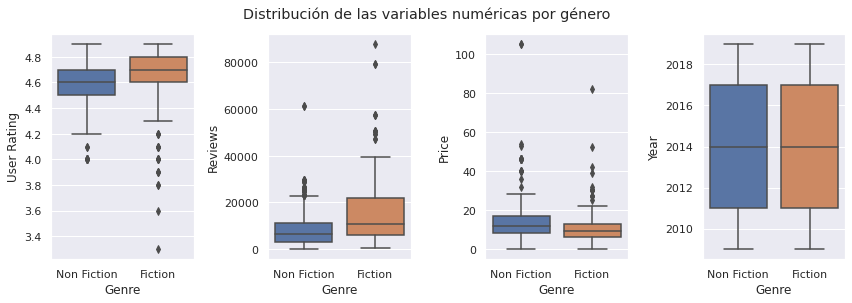

In [8]:
'''
  HEATMAP
    Visualización de una matriz, en este caso de correlación
'''

genrePlot, axs = plt.subplots(1, 4, figsize=(12, 4))

sns.boxplot(data=df, y='User Rating', ax=axs[0], x='Genre')
sns.boxplot(data=df, y='Reviews', ax=axs[1], x='Genre')
sns.boxplot(data=df, y='Price', ax=axs[2], x='Genre')
sns.boxplot(data=df, y='Year', ax=axs[3], x='Genre')

plt.tight_layout() # Ajustar imágenes a la cuadrícula

plt.suptitle('Distribución de las variables numéricas por género', y=1.05)

**¿Hay alguna variable que no aporta información?** <br>
Desde una perspectiva global, el año no aporta información valiosa sobre los datos. Por ello, si tuviera que eliminar variables esta sería mi primera opción, pues el objetivo es identificar diferenciadores entre géneros y ya dentro de un análisis posterior, podrían ocuparse los años para observar la evolución del perfil de consumidores (preferencias, reseñas...) o incluso del precio de los libros.

<Axes: >

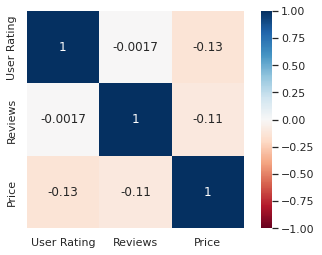

In [7]:
'''
  ANÁLISIS DE CORRELACIÓN
    Estimación de relación entre dos variables
    De utilidad para identificar qué tan probable es que exista una relación y su tipo (inversa o directamente proporcional)
'''

corr = df[['User Rating', 'Reviews', 'Price']].corr()
sns.heatmap(data=corr, vmin=-1, vmax = 1, cmap='RdBu', annot=True, square=True)

Text(0.5, 1.05, 'Gráfico de pares de las variables numéricas por género')

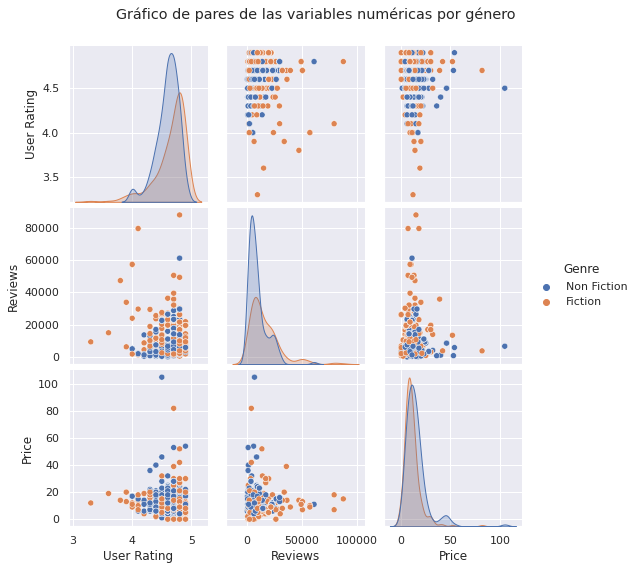

In [9]:
'''
  GRÁFICO DE DISPERSIÓN
    De ayuda para visualizar la relación entre dos variables
'''

sns.pairplot(data=df[['User Rating', 'Reviews', 'Price', 'Genre']], hue='Genre')
plt.suptitle('Gráfico de pares de las variables numéricas por género', y=1.05)

**Si comparas las variables, ¿todas están en rangos similares?** <br>
Las variables numéricas analizadas cuentan con escalas muy distintas, por ejemplo:
*   User rating [3.3, 4.9]
*   Reviews [37, 87841]
*   Price [0, 105]
<br>
Y, dado que KMeans usa la distancia euclidiana, es altamente probable que los resultados se vean afectados por estas diferencias.

**¿Puedes encontrar grupos qué se parezcan?** <br>
Observando las distribuciones de forma gráfica se puede apreciar una similitud entre el precio y reviews, sobre todo dentro del non-fiction genre. <br>
En cuanto a las gráficas de dispersión, la relación que arroja user rating tanto con price como con reviews es muy similar, aunque la primera tiene valores mucho más concentrados en una sola sección (incluso resulta ser el valor de correlación más alto con -0.13).

## Clústering

Una vez que hayas realizado un análisis preliminar, haz una segmentación utilizando el método de K-Means. Justifica el número de clusters que elegiste.
* Determina un valor de $k$
* Calcula los centros de los grupos resultantes del algoritmo k-means

Basado en los centros responde las siguientes preguntas
- ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?
- ¿Cómo obtuviste el valor de $k$ a usar?
- ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?
- ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?
- ¿Qué puedes decir de los datos basándose en los centros?

In [11]:
# Implementa el algoritmo de kmeans y justifica la elección del número de clusters
# Usa las variables numéricas

# PASO 1: Normalización
from sklearn.preprocessing import StandardScaler

# Variables a normalizar
numeric_cols = ['User Rating', 'Reviews',	'Price']
X = df.loc[:, numeric_cols]

# Hacemos el escalamiento
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# El escalador nos genera una matriz de numpy, vamos a convertirlo en DF
X_norm = pd.DataFrame(X_norm, columns=numeric_cols)
X_norm.head(6)

,User Rating,Reviews,Price
0,0.359990,0.460453,-0.470810
1,-0.080978,-0.844786,0.821609
2,0.359990,0.599440,0.175400
3,0.359990,0.808050,-0.655441
4,0.800958,-0.365880,-0.101547
5,-0.962913,0.058847,-0.193863


In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmax   = 15
grupos = range(2, kmax)
wcss   = []   # WCSS (within/intra-cluster sum of squares)
                # Distancia de los datos de cada grupo a su centro correspondiente
silScore = [] # Silhouette score
                # [0, 1] Medida de la confiabilidad de que cada observación pertenezca a su respectivo clúster

# Ciclo para calcular K-Means para diferentes k
for k in grupos:
    # Clustering
    model = KMeans(n_init=10, n_clusters=k, random_state = 11) 

    # Obtener las etiquetas
    clusters = model.fit_predict(X_norm)

    # Guardar WCSS
    wcss.append(model.inertia_)

    # Guardar Silhouette Score
    silScore.append(silhouette_score(X_norm, clusters))

Text(0.5, 1.0, 'Silhouette Score')

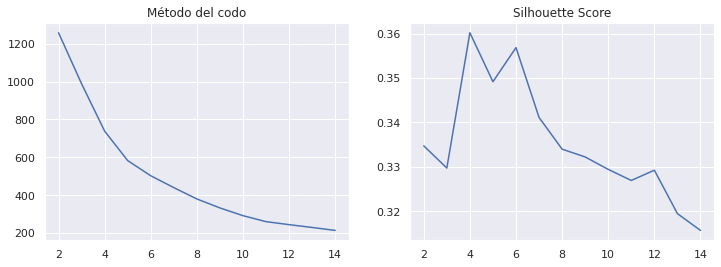

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(grupos, wcss)
axs[0].set_title('Método del codo')

axs[1].plot(grupos, silScore)
axs[1].set_title('Silhouette Score')

**¿Cómo obtuviste el valor de k a usar?** <br>
Después de establecer un rango para los valores de k, probé el método de KMeans con cada uno de ellos y fui recopilando tanto la WCSS como el silhouette score y, al contrastar los resultados de ambos (mediante la gráfica presentada anteriormente), determiné que 4 es el número indicado de clusters porque es el punto en el que se da el cambio más notorio en el método del codo y aquel con mayor puntaje en el silhoutte score.

In [20]:
# Generamos los 4 grupos
model = KMeans(n_clusters=4, random_state=11)
clusters = model.fit_predict(X_norm)

# Agregamos los clusters a nuestros DATOS ORIGINALES
df['Group'] = clusters.astype('str')
df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Name,Author,User Rating,Reviews,Price,Year,Genre,Group
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,1
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,0


In [27]:
# Haz un análisis por grupo para determinar las características que los hace únicos
# Ten en cuenta todas las variables numéricas.

# Centros de cada grupo
df[['User Rating', 'Reviews',	'Price', 'Group']].groupby('Group').mean()

,User Rating,Reviews,Price
Group,,,
0,4.696656,6679.140468,11.274247
1,4.693846,27444.646154,9.084615
2,4.597297,7685.891892,43.513514
3,4.232143,8631.666667,12.416667


In [28]:
# Dispersiones por grupo
df[['User Rating', 'Reviews',	'Price', 'Group']].groupby('Group').std()

,User Rating,Reviews,Price
Group,,,
0,0.118953,3965.406298,6.091999
1,0.184161,12779.526505,3.833825
2,0.162423,7099.980308,18.363039
3,0.208933,9097.337152,5.013736


**¿Qué puedes decir de los datos basado en los centros?** <br>
*   Grupo 0 <br>
    Rating:  Alrededor de  4.69 <br>
    Reviews: Promedio -> 6679 <br>
    Price: Medio -> 11.27<br>

*   Grupo 1 <br>
    Rating:  Alrededor de 4.69 <br>
    Reviews: Altas -> 27444 <br>
    Price: Bajo -> 9.08 <br>

*   Grupo 2 <br>
    Rating: Alrededor de 4.59 <br>
    Reviews: Promedio -> 7685 <br>
    Price: Alto -> aprox. 43.51 <br>

*   Grupo 3 <br>
    Rating: Alrededor de 4.23 <br>
    Reviews: Promedio -> aprox. 8631 <br>
    Price: Medio -> aprox. 12.41 <br>



Text(0.5, 1.05, '4 grupos de libros')

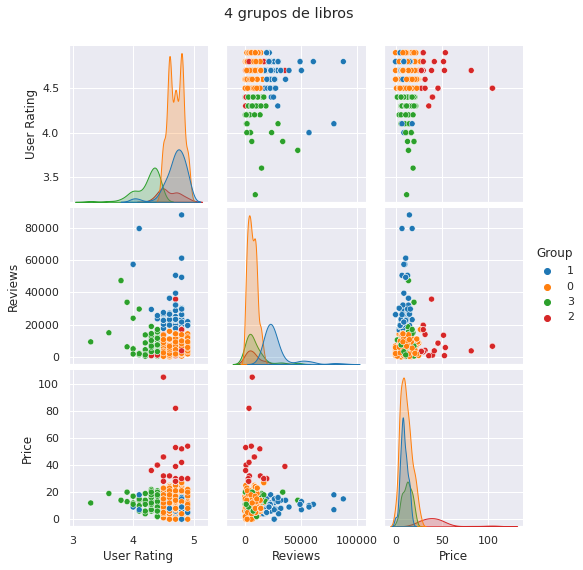

In [24]:
# Grafica los grupos con un pairplot
sns.pairplot(data=df[['User Rating', 'Reviews',	'Price', 'Group']], hue='Group', palette='tab10')
plt.suptitle('4 grupos de libros', y=1.05)

In [25]:
# Grafica los grupos con un scatterplot en 3D 
import plotly.express as px

fig = px.scatter_3d(df, x = 'User Rating', y = 'Reviews', 
                    z = 'Price', 
                    title='4 grupos de libros',
                    color='Group',  
                    color_discrete_sequence=px.colors.qualitative.D3)

fig.show()

**¿Crees que estos centros puedan ser representativos de los datos?** <br>
Sin duda 4 es el número de datos apropiado para representar los datos, pues después de iterar múltiples veces con distintos valores sobre la función KMeans, es el que más coincidencia arrojó tanto con la información como con el proceso seguido. <br>
Adicionalmente, después de observar la dispersión de los datos una vez divididos en 4 grupos se puede ver que los registros tienden a agruparse bastante bien. <br>
Sin embargo, los outliers y algunos registros (como aquellos con precio de 0) podrían estar interviniendo en el resultado arrojado, así que, aunque me parece que se alcanzaron resultados representativos, podría hacerse un análisis mucho más apropiado y, en general, mejorado al remover tanto los outliers como los registros que no aportan valor al análisis. 

**¿Los centros serían más representativos si usaras un valor más alto/bajo?** <br>
En este caso no, justamente porque se probaron muchos valores de k para encontrar el que mejor se adapte a los datos.